In [1]:
import sys
sys.path.insert(0, '/home/marcelo/Workspace/MF_Model/Modules')

import mf_models as mf
import model_type as mt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Customize matplotlib
matplotlib.rcParams.update(
	{
		'text.usetex': False,
		'font.family': 'stixgeneral',
		'mathtext.fontset': 'stix',
		'font.size': 22,
		'ytick.color' : 'black',
		"xtick.color" : 'black',
		'axes.labelcolor' : 'black',
		'axes.edgecolor' : 'black'
	}
)


In [2]:
vec_nu_i = np.array([0.005, 0.01, 0.02])
vec_nu_label = ["5", "10", "20"]
vec_tau_E = np.linspace(0.1, 100, 100)

df_mu = pd.DataFrame({vec_nu_i[0]:np.zeros_like(vec_tau_E),
					vec_nu_i[1]:np.zeros_like(vec_tau_E),
					vec_nu_i[2]:np.zeros_like(vec_tau_E)})

df_sigma_V = pd.DataFrame({vec_nu_i[0]:np.zeros_like(vec_tau_E),
						vec_nu_i[1]:np.zeros_like(vec_tau_E),
						vec_nu_i[2]:np.zeros_like(vec_tau_E)})

df_nu = pd.DataFrame({vec_nu_i[0]:np.zeros_like(vec_tau_E),
					vec_nu_i[1]:np.zeros_like(vec_tau_E),
					vec_nu_i[2]:np.zeros_like(vec_tau_E)})

for nu_i in vec_nu_i:
	for i, tau_E in enumerate(vec_tau_E):
		model_type = mt.MFCoBaIF(wE_val = 0.1,
						wI_val = 0.4,
						tauE_val = tau_E,
						tauI_val = 10,
						KE_val = 400,
						KI_val = 100,
						nuE_val = nu_i,
						nuI_val = nu_i)

		LV_model = mf.LangevinModel(model_type)
		LV_model.sigmaV
		mu, sigma = LV_model.model_type.data_parameters.substitute_parameters_values([LV_model.mu, LV_model.sigmaV])
		df_mu[nu_i][i] = mu
		df_sigma_V[nu_i][i] = sigma



/tmp/ipykernel_20837/456173644.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mu[nu_i][i] = mu
/tmp/ipykernel_20837/456173644.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sigma_V[nu_i][i] = sigma


In [3]:
n = 30000

for nu_i in vec_nu_i:
	print(nu_i, end='\t')
	for i, tau_E in enumerate(vec_tau_E):
		print(i, end=' ')
		model_type = mt.MFCoBaIF(wE_val = 0.1,
						wI_val = 0.4,
						tauE_val = tau_E,
						tauI_val = 10,
						KE_val = 400,
						KI_val = 100,
						nuE_val = nu_i,
						nuI_val = nu_i)
		LV_model = mf.LangevinModel(model_type)
		FP_model = mf.FokkerPlanckModel(LV_model, True)
		E_I = model_type.data_parameters.values[model_type.vec_E[2]]
		V_th = model_type.data_parameters.values[model_type.Vth]

		vec_Vk = np.linspace(E_I, V_th, n + 1)

		df_nu[nu_i][i] = FP_model.calculate_firing_rate (vec_Vk)
	
	print()

0.005	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
0.01	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
0.02	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 


In [4]:
df_nu

,0.005,0.010,0.020
0,0.000000e+00,0.000000e+00,0.000000e+00
1,9.743475e-73,2.049370e-88,1.073935e-111
2,7.745671e-31,5.156536e-37,7.630281e-50
3,3.659159e-15,1.805317e-17,1.067325e-23
4,1.665946e-07,8.486822e-08,7.470351e-10
...,...,...,...
95,4.544050e-01,4.761728e-01,4.878110e-01
96,4.548607e-01,4.764215e-01,4.879412e-01
97,4.553073e-01,4.766651e-01,4.880686e-01
98,4.557451e-01,4.769038e-01,4.881934e-01


In [5]:
fRate_data_path = "../../Data/fRate_data/"
V_data_path = "../../Data/V_data/"

df_nu_sim_read = pd.read_csv(f"{fRate_data_path}firing_rate_iRate.dat", index_col=0)
df_mu_sim_read = pd.read_csv(f"{V_data_path}mean_V_ta_iRate.dat", index_col=0)
df_sigma_V_sim_read = pd.read_csv(f"{V_data_path}var_V_ta_iRate.dat", index_col=0)

df_mu_sim_read


,tauA,5,10,20
0,0.10000,-72.627699,-75.300198,-77.049282
1,0.60201,-70.214860,-72.425135,-73.766838
2,1.10402,-68.229024,-69.665390,-70.671601
3,1.60603,-65.982644,-67.172607,-67.958467
4,2.10804,-64.115257,-64.808545,-65.367030
...,...,...,...,...
195,97.99196,-9.773240,-8.510439,-7.978084
196,98.49397,-9.716927,-8.505683,-7.955067
197,98.99598,-9.621671,-8.456356,-7.910107
198,99.49799,-9.589893,-8.448515,-7.897734


In [6]:
index = list(range(0, 200, 3))
df_nu_sim = pd.DataFrame({vec_nu_i[0]:np.zeros_like(vec_tau_E),
					vec_nu_i[1]:np.zeros_like(vec_tau_E),
					vec_nu_i[2]:np.zeros_like(vec_tau_E)})

df_mu_sim = pd.DataFrame({"tau_E": df_mu_sim_read['tauA'],
					vec_nu_i[0]:df_mu_sim_read['5'], 
					vec_nu_i[1]:df_mu_sim_read['10'],
					vec_nu_i[2]:df_mu_sim_read['20']})

df_sigma_V_sim = pd.DataFrame({"tau_E": df_sigma_V_sim_read['tauA'],
					vec_nu_i[0]:df_sigma_V_sim_read['5'], 
					vec_nu_i[1]:df_sigma_V_sim_read['10'],
					vec_nu_i[2]:df_sigma_V_sim_read['20']})

for nu_i, nu_label in zip(vec_nu_i, vec_nu_label):
	for i in range(len(vec_tau_E)):
		df_nu_sim[nu_i][i] = df_nu_sim_read[nu_label][3*i]



In [7]:
df_error = pd.DataFrame({vec_nu_i[0]:np.zeros_like(vec_tau_E),
						vec_nu_i[1]:np.zeros_like(vec_tau_E),
						vec_nu_i[2]:np.zeros_like(vec_tau_E)})

for nu_i in vec_nu_i:
	for i, (nu_sim, nu_analyt) in enumerate(zip(df_nu_sim[nu_i], df_nu[nu_i])):
		df_error[nu_i][i] = np.abs(nu_sim - nu_analyt * 1000)


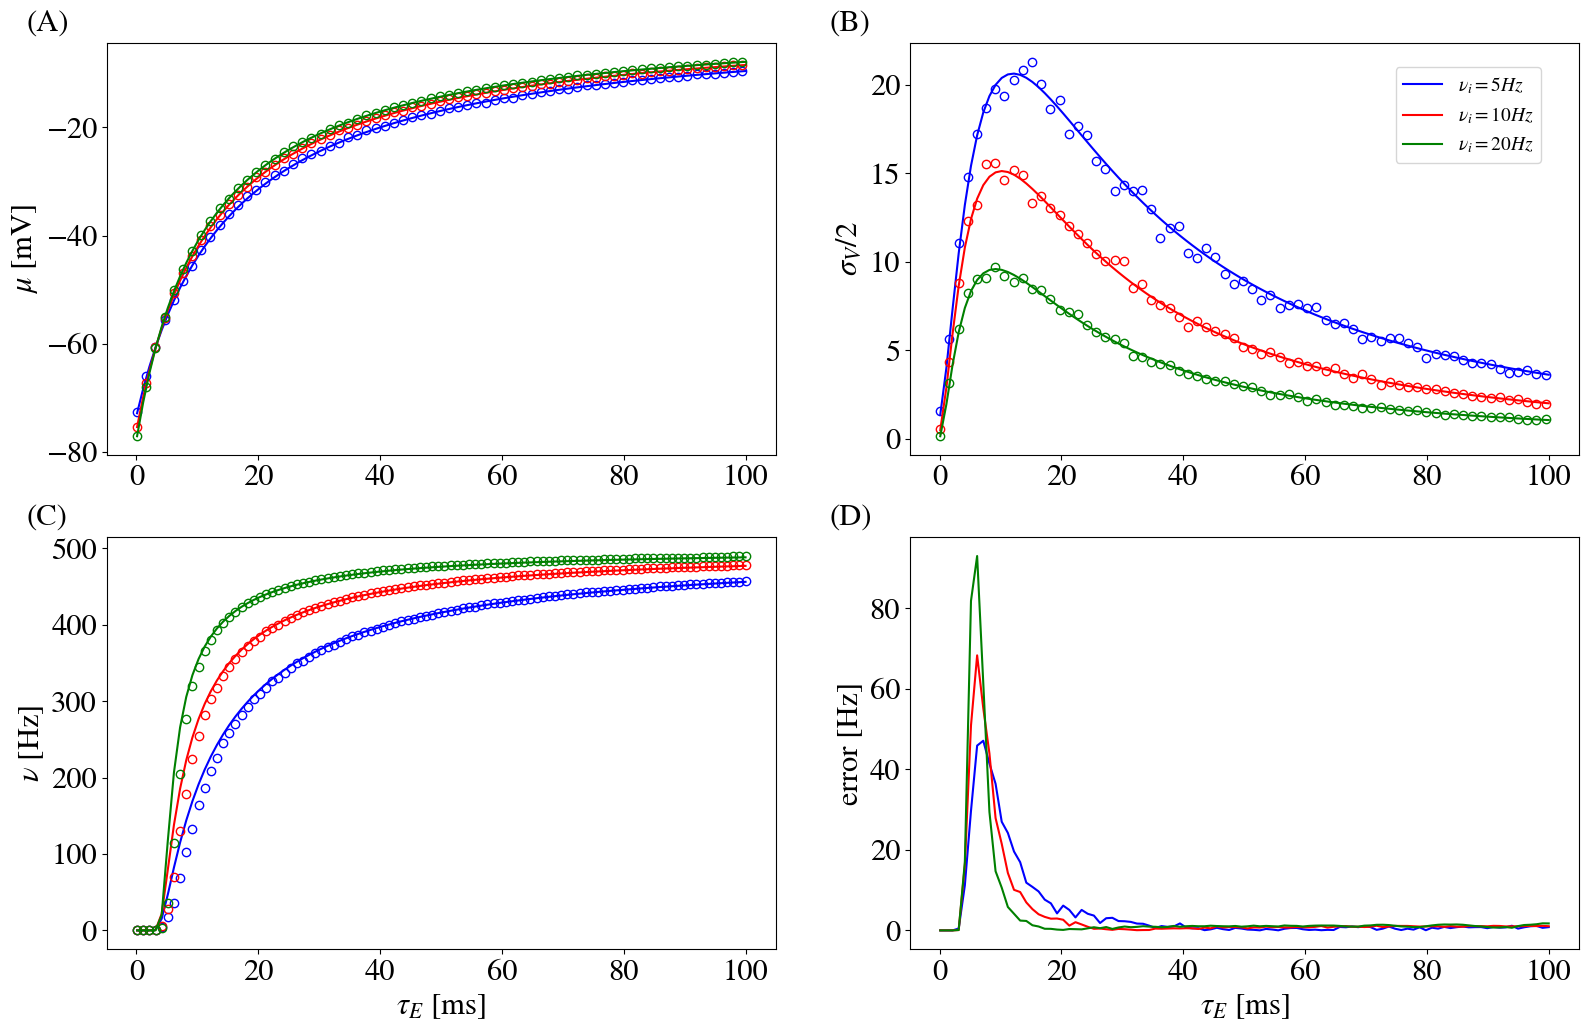

In [7]:
index = list(range(0, 200, 3))

fig, axs = plt.subplots(2, 2, figsize=(19,12), dpi=100, squeeze=False)
axs[0][0].annotate("(A)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[0][1].annotate("(B)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[1][0].annotate("(C)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[1][1].annotate("(D)", xy=(-0.12, 1.03), xycoords="axes fraction")

axs[1][0].set_xlabel(r'$\tau_E$ [ms]')
axs[1][1].set_xlabel(r'$\tau_E$ [ms]')
axs[0][0].set_ylabel(r'$\mu$ [mV]')
axs[0][1].set_ylabel(r'$\sigma_V/2$')
axs[1][0].set_ylabel(r'$\nu$ [Hz]')
axs[1][1].set_ylabel('error [Hz]')

axs[0][0].plot(vec_tau_E, df_mu[vec_nu_i[0]], 'b-', label=r'$\nu_i = 5Hz$')
axs[0][0].plot(df_mu_sim['tau_E'][index], df_mu_sim[vec_nu_i[0]][index], 'bo', markerfacecolor='none')
axs[0][0].plot(vec_tau_E, df_mu[vec_nu_i[1]], 'r-', label=r'$\nu_i = 10Hz$')
axs[0][0].plot(df_mu_sim['tau_E'][index], df_mu_sim[vec_nu_i[1]][index], 'ro', markerfacecolor='none')
axs[0][0].plot(vec_tau_E, df_mu[vec_nu_i[2]], 'g-', label=r'$\nu_i = 20Hz$')
axs[0][0].plot(df_mu_sim['tau_E'][index], df_mu_sim[vec_nu_i[2]][index], 'go', markerfacecolor='none')

axs[0][1].plot(vec_tau_E, df_sigma_V[vec_nu_i[0]]/2, 'b-')
axs[0][1].plot(df_sigma_V_sim['tau_E'][index], df_sigma_V_sim[vec_nu_i[0]][index], 'bo', markerfacecolor='none')
axs[0][1].plot(vec_tau_E, df_sigma_V[vec_nu_i[1]]/2, 'r-')
axs[0][1].plot(df_sigma_V_sim['tau_E'][index], df_sigma_V_sim[vec_nu_i[1]][index], 'ro', markerfacecolor='none')
axs[0][1].plot(vec_tau_E, df_sigma_V[vec_nu_i[2]]/2, 'g-')
axs[0][1].plot(df_sigma_V_sim['tau_E'][index], df_sigma_V_sim[vec_nu_i[2]][index], 'go', markerfacecolor='none')

axs[1][0].plot(vec_tau_E, df_nu[vec_nu_i[0]]*1000, 'b-')
axs[1][0].plot(vec_tau_E, df_nu_sim[vec_nu_i[0]], 'bo', markerfacecolor='none')
axs[1][0].plot(vec_tau_E, df_nu[vec_nu_i[1]]*1000, 'r-')
axs[1][0].plot(vec_tau_E, df_nu_sim[vec_nu_i[1]], 'ro', markerfacecolor='none')
axs[1][0].plot(vec_tau_E, df_nu[vec_nu_i[2]]*1000, 'g-')
axs[1][0].plot(vec_tau_E, df_nu_sim[vec_nu_i[2]], 'go', markerfacecolor='none')

axs[1][1].plot(vec_tau_E, df_error[vec_nu_i[0]], 'b-')
axs[1][1].plot(vec_tau_E, df_error[vec_nu_i[1]], 'r-')
axs[1][1].plot(vec_tau_E, df_error[vec_nu_i[2]], 'g-')
fig.legend(bbox_to_anchor=(0.88, 0.86), loc=1, borderaxespad=0., prop={'size': 14})

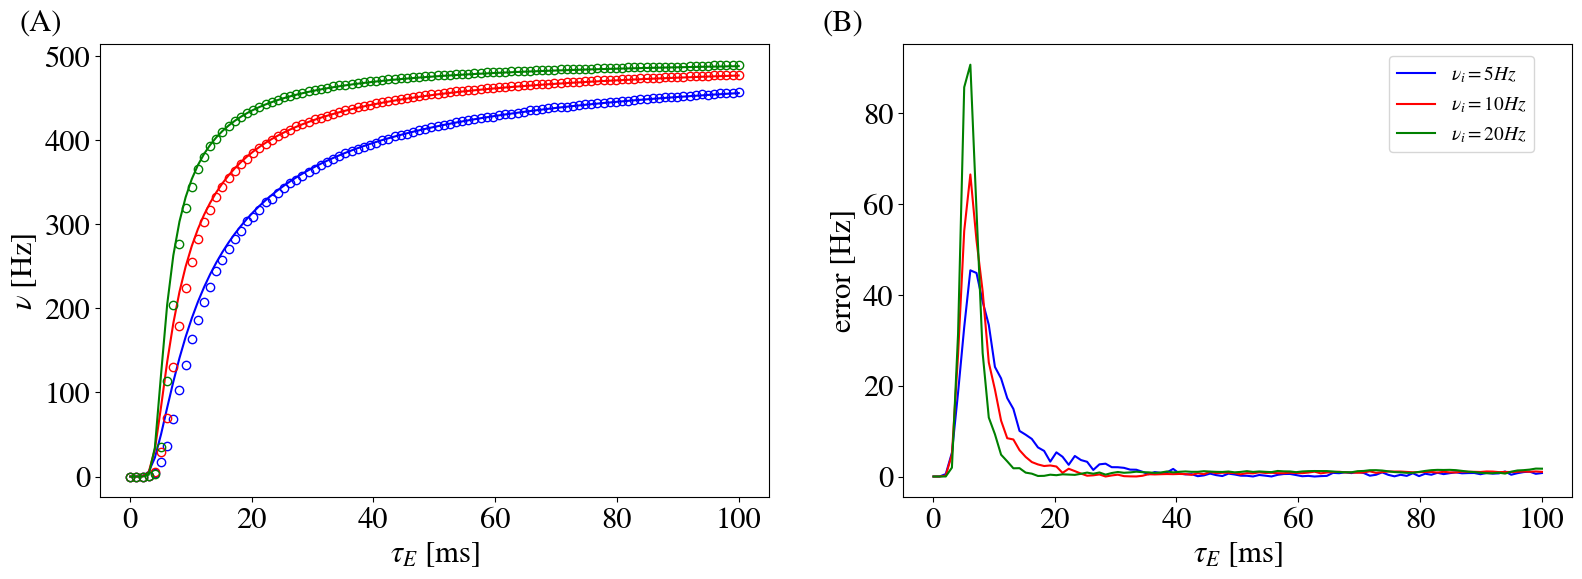

In [12]:
index = list(range(0, 200, 3))

fig, axs = plt.subplots(1, 2, figsize=(19,6), dpi=100, squeeze=False)
axs[0][0].annotate("(A)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[0][1].annotate("(B)", xy=(-0.12, 1.03), xycoords="axes fraction")

axs[0][0].set_xlabel(r'$\tau_E$ [ms]')
axs[0][1].set_xlabel(r'$\tau_E$ [ms]')
axs[0][0].set_ylabel(r'$\nu$ [Hz]')
axs[0][1].set_ylabel('error [Hz]')

axs[0][0].plot(vec_tau_E, df_nu[vec_nu_i[0]]*1000, 'b-', label=r'$\nu_i = 5Hz$')
axs[0][0].plot(vec_tau_E, df_nu_sim[vec_nu_i[0]], 'bo', markerfacecolor='none')
axs[0][0].plot(vec_tau_E, df_nu[vec_nu_i[1]]*1000, 'r-', label=r'$\nu_i = 10Hz$')
axs[0][0].plot(vec_tau_E, df_nu_sim[vec_nu_i[1]], 'ro', markerfacecolor='none')
axs[0][0].plot(vec_tau_E, df_nu[vec_nu_i[2]]*1000, 'g-', label=r'$\nu_i = 20Hz$')
axs[0][0].plot(vec_tau_E, df_nu_sim[vec_nu_i[2]], 'go', markerfacecolor='none')

axs[0][1].plot(vec_tau_E, df_error[vec_nu_i[0]], 'b-')
axs[0][1].plot(vec_tau_E, df_error[vec_nu_i[1]], 'r-')
axs[0][1].plot(vec_tau_E, df_error[vec_nu_i[2]], 'g-')
fig.legend(bbox_to_anchor=(0.88, 0.86), loc=1, borderaxespad=0., prop={'size': 14})